Crime Statistics in San Francisco

I wanted to find out if there are any trends in the time of day and the amount of incidents reported.  To start, I looked at a simple total of incidents aggregated by hour.  There definitely seems to be a spike of activity between hours 17 and 18 of the day.  This is surprising to me, since I had thought more crime would happen later at night than 5-6PM in the evening.  But maybe the simple total is misleading, I should look into more specifically what types of incidents occur at what times of day to get a clearer picture.

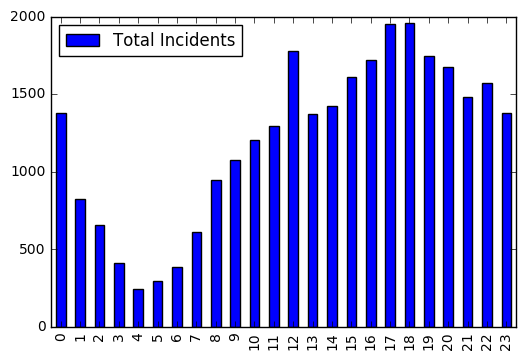

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

totalIncidents = pd.DataFrame({
    'Total Incidents': df.groupby(pd.DatetimeIndex(df.Time).hour).size()
})

totalIncidents.plot.bar()

plt.show()

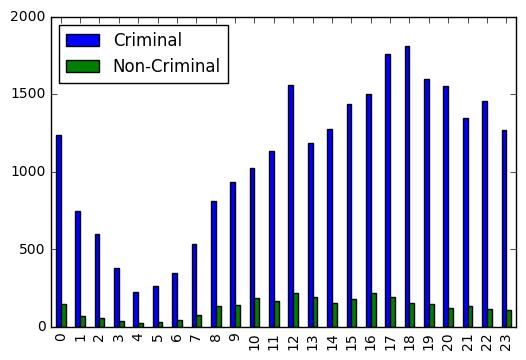

In [35]:
nonCriminal = df[df.Category == 'NON-CRIMINAL']
criminal = df[df.Category != 'NON-CRIMINAL']

pd.DataFrame({
    'Non-Criminal': nonCriminal.groupby(pd.DatetimeIndex(nonCriminal.Time).hour).size(),
    'Criminal': criminal.groupby(pd.DatetimeIndex(criminal.Time).hour).size()
}).plot.bar()

plt.show()

By separating out the criminal and non-criminal totals, I can see that non-criminal incidents do not follow the same trend as criminal incidents.  Also, I can see that the trend of criminal incidents appears to not have changed.  I wonder if this trend is in any way affected by the day of the week.

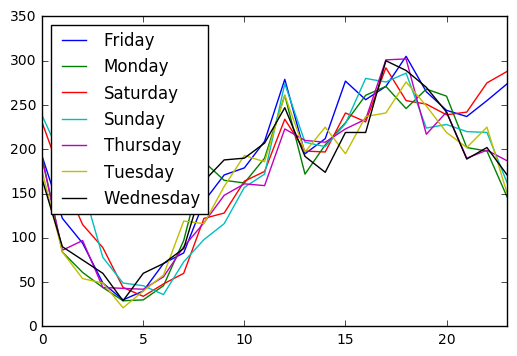

In [44]:
sunday = df[df.DayOfWeek == 'Sunday']
monday = df[df.DayOfWeek == 'Monday']
tuesday = df[df.DayOfWeek == 'Tuesday']
wednesday = df[df.DayOfWeek == 'Wednesday']
thursday = df[df.DayOfWeek == 'Thursday']
friday = df[df.DayOfWeek == 'Friday']
saturday = df[df.DayOfWeek == 'Saturday']


pd.DataFrame({
    'Monday': monday.groupby(pd.DatetimeIndex(monday.Time).hour).size(),
    'Tuesday': tuesday.groupby(pd.DatetimeIndex(tuesday.Time).hour).size(),
    'Wednesday': wednesday.groupby(pd.DatetimeIndex(wednesday.Time).hour).size(),
    'Thursday': thursday.groupby(pd.DatetimeIndex(thursday.Time).hour).size(),
    'Friday': friday.groupby(pd.DatetimeIndex(friday.Time).hour).size(),
    'Saturday': saturday.groupby(pd.DatetimeIndex(saturday.Time).hour).size(),
    'Sunday': sunday.groupby(pd.DatetimeIndex(sunday.Time).hour).size(),
}).plot()

plt.show()

All days of the week seem to carry the same trend - a spike at noon and a spike around 5-6PM.  Interestingly, Friday and Saturday seem to also have a spike around midnight which is more like what I was originally speculating.  The times of day that crimes are reported seem to follow a trend correlating when people get out of work - this could use further investigation!